In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# DATA SET 17

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2017.csv")
a

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,27.0,NaN,65.0,NaN,NaN,NaN,NaN,NaN,28079056
210116,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,14.0,NaN,NaN,73.0,NaN,7.0,NaN,NaN,28079057
210117,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN,28079058
210118,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,11.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,28079059


In [3]:
b=a.fillna(value=10)
b

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,10.0,10.0,0.3,10.0,10.00,4.0,38.0,10.0,10.0,10.0,10.0,5.0,10.0,10.0,28079004
1,2017-06-01 01:00:00,0.6,10.0,0.3,0.4,0.08,3.0,39.0,10.0,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,10.0,10.0,0.1,10.00,1.0,14.0,10.0,10.0,10.0,10.0,10.0,10.0,0.9,28079011
3,2017-06-01 01:00:00,10.0,10.0,0.2,10.0,10.00,1.0,9.0,10.0,91.0,10.0,10.0,10.0,10.0,10.0,28079016
4,2017-06-01 01:00:00,10.0,10.0,10.0,10.0,10.00,1.0,19.0,10.0,69.0,10.0,10.0,2.0,10.0,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,2017-08-01 00:00:00,10.0,10.0,0.2,10.0,10.00,1.0,27.0,10.0,65.0,10.0,10.0,10.0,10.0,10.0,28079056
210116,2017-08-01 00:00:00,10.0,10.0,0.2,10.0,10.00,1.0,14.0,10.0,10.0,73.0,10.0,7.0,10.0,10.0,28079057
210117,2017-08-01 00:00:00,10.0,10.0,10.0,10.0,10.00,1.0,4.0,10.0,83.0,10.0,10.0,10.0,10.0,10.0,28079058
210118,2017-08-01 00:00:00,10.0,10.0,10.0,10.0,10.00,1.0,11.0,10.0,78.0,10.0,10.0,10.0,10.0,10.0,28079059


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     210120 non-null  object 
 1   BEN      210120 non-null  float64
 2   CH4      210120 non-null  float64
 3   CO       210120 non-null  float64
 4   EBE      210120 non-null  float64
 5   NMHC     210120 non-null  float64
 6   NO       210120 non-null  float64
 7   NO_2     210120 non-null  float64
 8   NOx      210120 non-null  float64
 9   O_3      210120 non-null  float64
 10  PM10     210120 non-null  float64
 11  PM25     210120 non-null  float64
 12  SO_2     210120 non-null  float64
 13  TCH      210120 non-null  float64
 14  TOL      210120 non-null  float64
 15  station  210120 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 25.6+ MB


In [5]:
b.describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
count,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,210120.000000,2.101200e+05
mean,7.753124,9.735242,6.010121,7.715593,8.803241,23.341862,41.422235,38.977913,32.143575,14.928936,9.986979,8.699443,8.957021,8.232590,2.807904e+07
std,4.028101,1.492969,4.749375,4.102661,3.222339,50.245312,32.370284,90.183968,32.414310,12.686455,3.603471,3.794126,2.809635,3.720092,1.761357e+01
min,0.100000,1.000000,0.100000,0.100000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.150000,0.100000,2.807900e+07
25%,10.000000,10.000000,0.300000,10.000000,10.000000,2.000000,17.000000,10.000000,10.000000,10.000000,10.000000,7.000000,10.000000,10.000000,2.807902e+07
50%,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,33.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.807904e+07
75%,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000,58.000000,10.000000,54.000000,16.000000,10.000000,10.000000,10.000000,10.000000,2.807906e+07
max,19.600000,10.000000,10.000000,38.299999,10.000000,973.000000,349.000000,1798.000000,193.000000,308.000000,96.000000,98.000000,10.000000,91.000000,2.807906e+07


In [6]:
c=b.head(10000)
c

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,10.0,10.0,0.3,10.0,10.00,4.0,38.0,10.0,10.0,10.0,10.0,5.0,10.0,10.0,28079004
1,2017-06-01 01:00:00,0.6,10.0,0.3,0.4,0.08,3.0,39.0,10.0,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,10.0,10.0,0.1,10.00,1.0,14.0,10.0,10.0,10.0,10.0,10.0,10.0,0.9,28079011
3,2017-06-01 01:00:00,10.0,10.0,0.2,10.0,10.00,1.0,9.0,10.0,91.0,10.0,10.0,10.0,10.0,10.0,28079016
4,2017-06-01 01:00:00,10.0,10.0,10.0,10.0,10.00,1.0,19.0,10.0,69.0,10.0,10.0,2.0,10.0,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2017-06-18 11:00:00,10.0,10.0,0.3,10.0,10.00,3.0,14.0,10.0,95.0,10.0,10.0,10.0,10.0,10.0,28079039
9996,2017-06-18 11:00:00,10.0,10.0,10.0,10.0,10.00,3.0,18.0,10.0,10.0,25.0,10.0,9.0,10.0,10.0,28079040
9997,2017-06-18 11:00:00,10.0,10.0,10.0,10.0,10.00,2.0,17.0,10.0,10.0,17.0,11.0,10.0,10.0,10.0,28079047
9998,2017-06-18 11:00:00,10.0,10.0,10.0,10.0,10.00,3.0,18.0,10.0,10.0,18.0,12.0,10.0,10.0,10.0,28079048


In [7]:
c.columns

Index(['date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3',
       'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [8]:
d=c[['BEN', 'CO', 'EBE','NMHC', 'NO_2','O_3',
       'PM10','SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL,station
0,10.0,0.3,10.0,10.00,38.0,10.0,10.0,5.0,10.0,10.0,28079004
1,0.6,0.3,0.4,0.08,39.0,71.0,22.0,7.0,1.4,2.9,28079008
2,0.2,10.0,0.1,10.00,14.0,10.0,10.0,10.0,10.0,0.9,28079011
3,10.0,0.2,10.0,10.00,9.0,91.0,10.0,10.0,10.0,10.0,28079016
4,10.0,10.0,10.0,10.00,19.0,69.0,10.0,2.0,10.0,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,0.3,10.0,10.00,14.0,95.0,10.0,10.0,10.0,10.0,28079039
9996,10.0,10.0,10.0,10.00,18.0,10.0,25.0,9.0,10.0,10.0,28079040
9997,10.0,10.0,10.0,10.00,17.0,10.0,17.0,10.0,10.0,10.0,28079047
9998,10.0,10.0,10.0,10.00,18.0,10.0,18.0,10.0,10.0,10.0,28079048


# LINEAR REGRESSION

In [9]:
x=d[['BEN', 'CO', 'EBE','NMHC', 'NO_2','O_3',
       'PM10','SO_2', 'TCH', 'TOL']]
y=d['station']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)


28079044.48170404


In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-0.307495
CO,1.191944
EBE,1.756716
NMHC,24.770092
NO_2,-0.087996
O_3,-0.004387
PM10,0.228058
SO_2,1.431444
TCH,-28.666350
TOL,0.105485


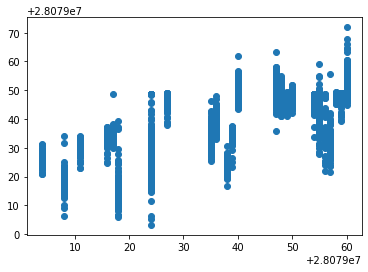

In [14]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [15]:
print(lr.score(x_test,y_test))

0.3988884892595562


In [16]:
lr.score(x_train,y_train)

0.4026276850174403

# LASSO REGRESSION

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
la.score(x_test,y_test)

0.322510054214426

# RIDGE REGRESSION

In [20]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [21]:
rr.score(x_test,y_test)

0.39860537100528304

# LOGISTIC REGRESSION

In [22]:
w=d.iloc[:,0:8]
w1=d.iloc[:,-1]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
b=StandardScaler().fit_transform(w)


In [25]:
from sklearn.model_selection import train_test_split
w_train,w_test,w1_train,w1_test=train_test_split(w,w1,test_size=0.7)

In [26]:
p=LogisticRegression(max_iter=10000)
p.fit(b,w1)

LogisticRegression(max_iter=10000)

In [27]:
t=[[12,22,32,42,52,45,32,56]]


In [28]:
e=p.predict(t)
print(e)

[28079060]


In [29]:
p.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [30]:
print(p.score(w_test,w1_test))

0.05714285714285714


In [31]:
p.predict_proba(t)[0][0]

3.495305900361044e-306

In [32]:
p.predict_proba(t)[0][1]

8.73979543126077e-155

# ELASTIC NET

In [33]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [34]:
print(p.coef_)

[ 0.53521507  1.16247689  0.87148438 -0.14342973 -0.1038134  -0.00529359
  0.20746552  1.24465387 -0.37323314  0.07860791]


In [35]:
print(p.intercept_)

28079013.979621757


In [36]:
print(p.predict(x_test))

[28079047.50725589 28079042.41804554 28079021.38030815 ...
 28079031.07886161 28079051.93659442 28079039.49407524]


In [37]:
print(p.score(x_test,y_test))

0.38041506733880215


# RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
parameters={'max_depth':[1,57,23,53,57],
  'min_samples_leaf':[5,34,67,7,45],
           'n_estimators':[2,46,56,23,56]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 57, 23, 53, 57],
                         'min_samples_leaf': [5, 34, 67, 7, 45],
                         'n_estimators': [2, 46, 56, 23, 56]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.7321428571428572

In [42]:
rfc_best=grid_search.best_estimator_

[Text(641.5802910987368, 2603.102727272727, 'X[7] <= 6.5\ngini = 0.958\nsamples = 4451\nvalue = [275, 319, 319, 296, 292, 317, 261, 296, 269, 269\n271, 300, 300, 279, 287, 295, 269, 315, 287, 301\n299, 319, 295, 270]'),
 Text(260.76747720364745, 2482.0281818181816, 'X[0] <= 7.95\ngini = 0.836\nsamples = 1069\nvalue = [261, 1, 0, 0, 290, 317, 251, 0, 16, 0, 269, 0\n0, 0, 0, 0, 0, 0, 0, 0, 291, 0, 0, 0]'),
 Text(93.28267477203649, 2360.953636363636, 'X[3] <= 5.2\ngini = 0.664\nsamples = 519\nvalue = [0, 1, 0, 0, 0, 308, 246, 0, 0, 0, 261, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(33.9209726443769, 2239.879090909091, 'X[3] <= 0.095\ngini = 0.008\nsamples = 147\nvalue = [0, 1, 0, 0, 0, 0, 239, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(16.96048632218845, 2118.8045454545454, 'gini = 0.198\nsamples = 8\nvalue = [0, 1, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(50.881458966565354, 2118.8045454545454, 'gini = 0.0\nsamples = 139\nvalue = [0

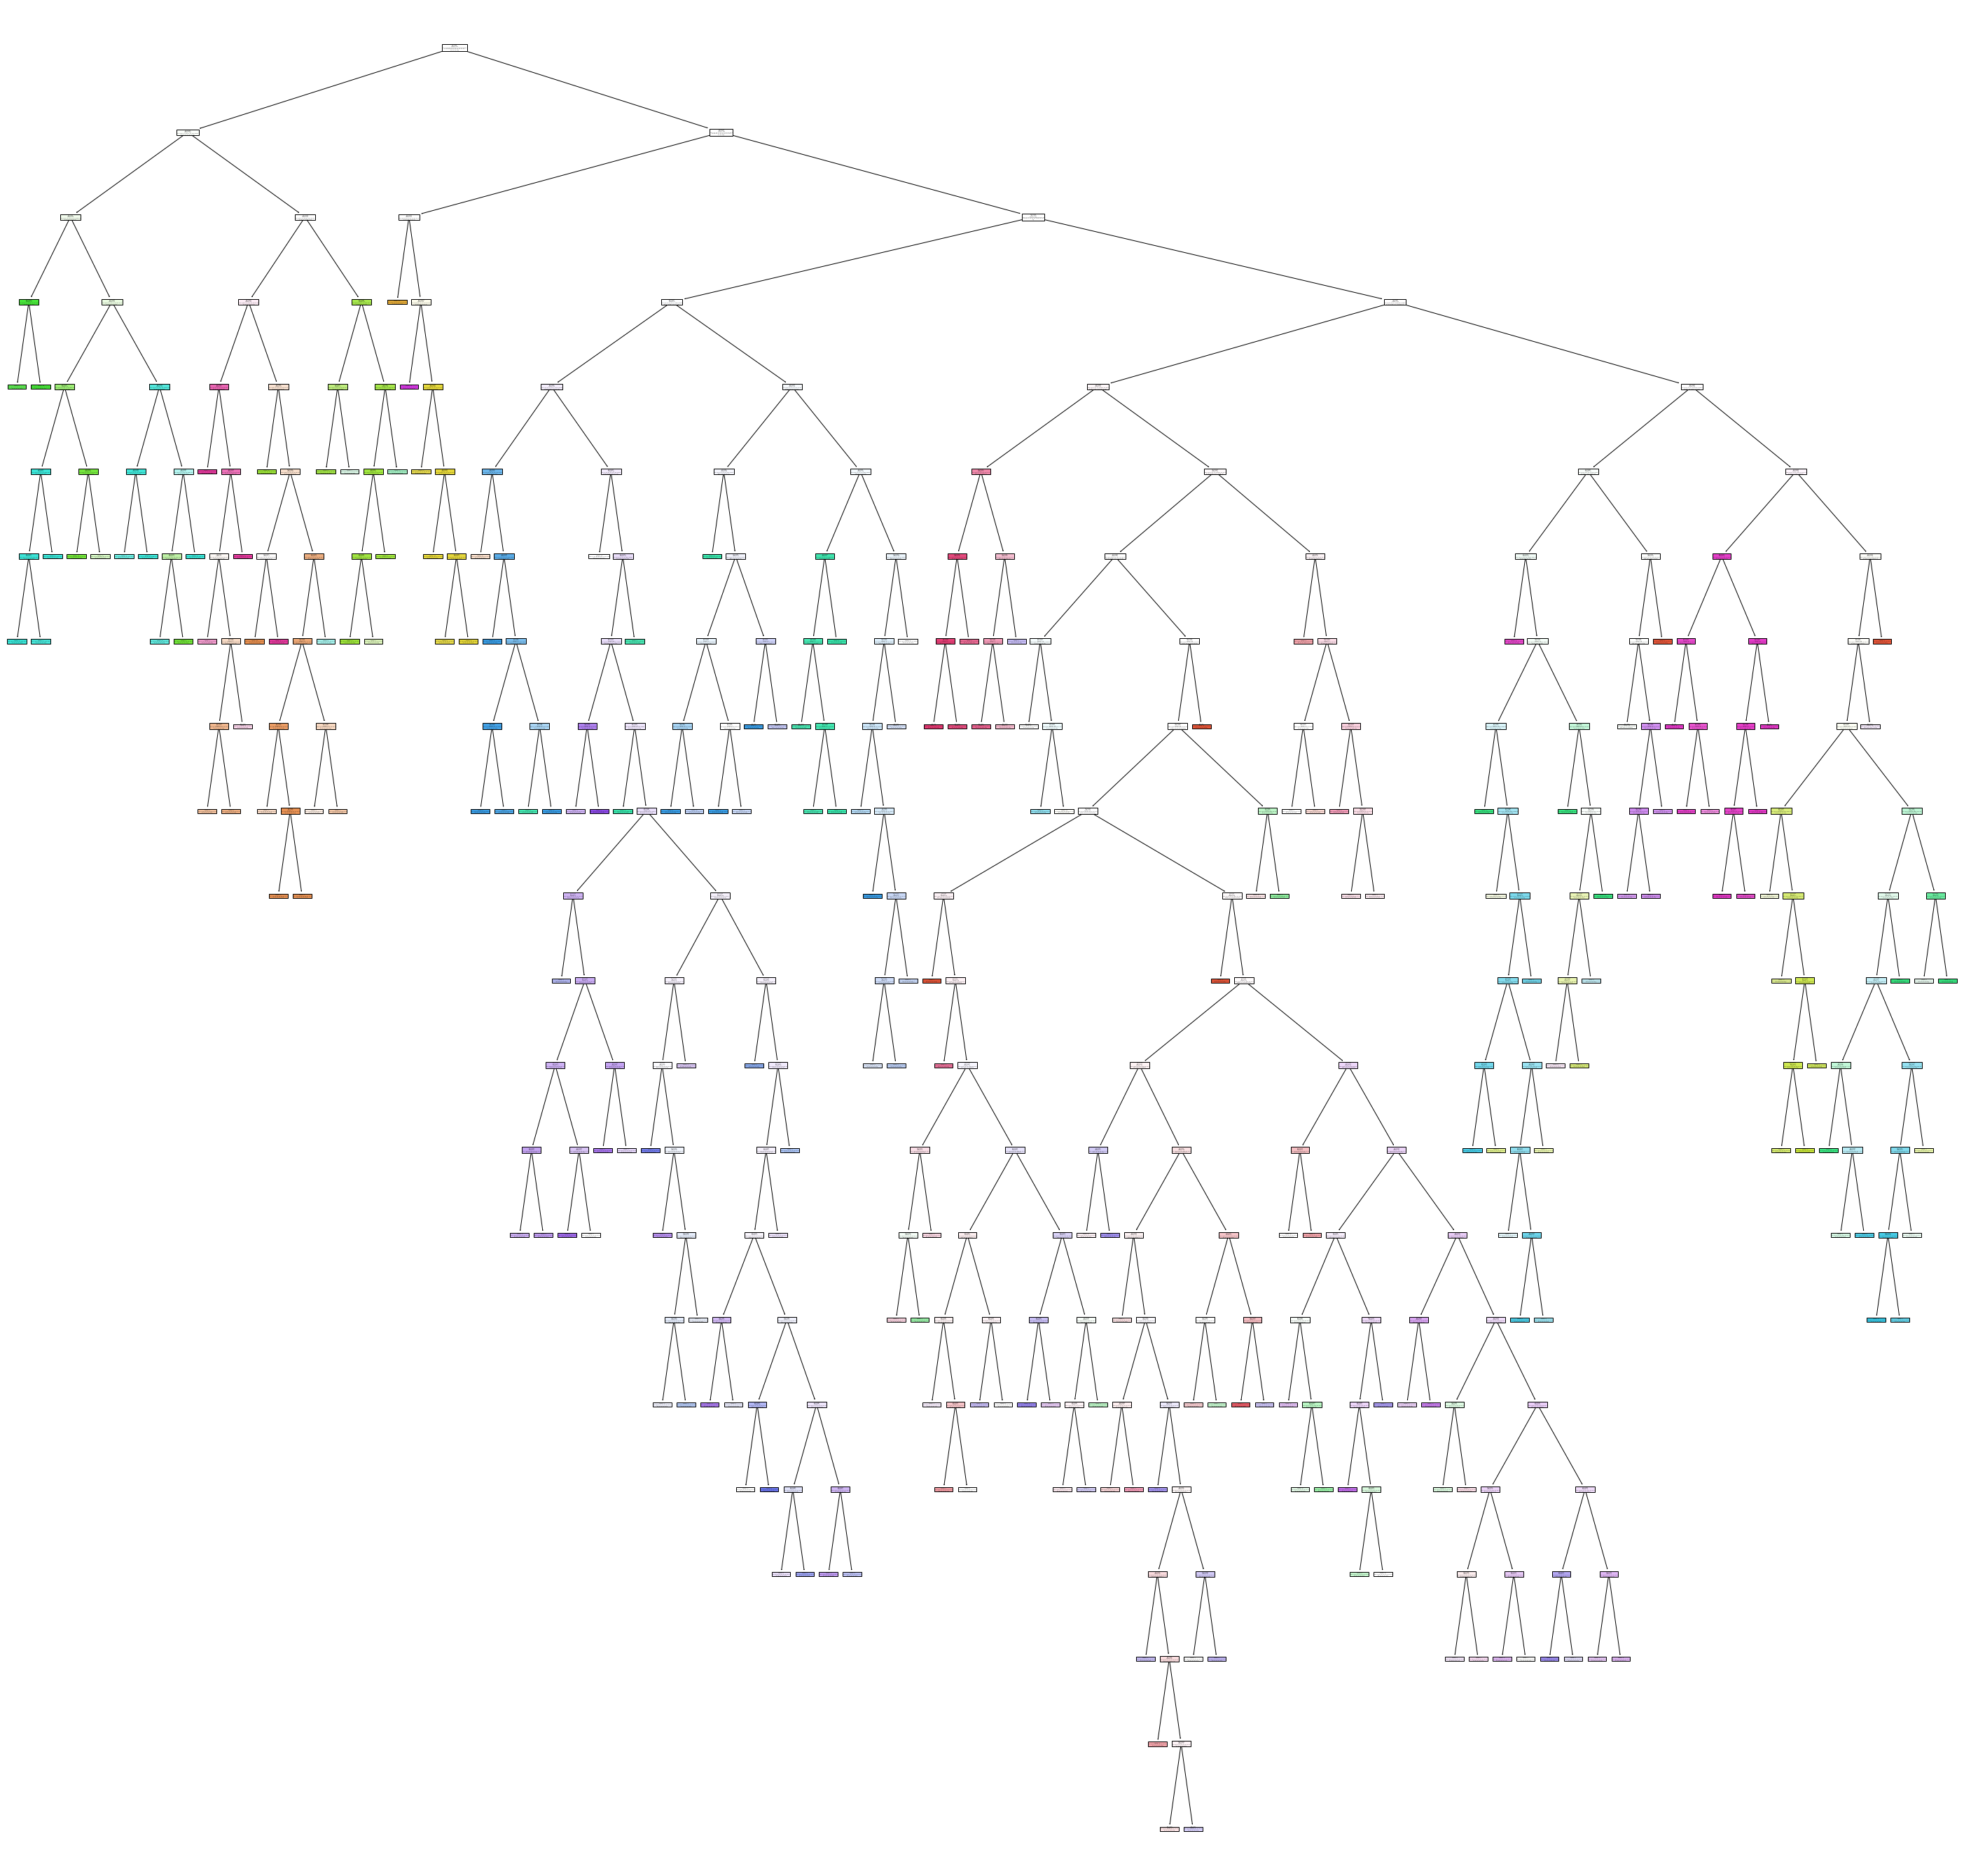

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:Random Forest score=0.7321428571428572 is a Highest accuracy

# DATA SET 18

In [44]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2018.csv")
s

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,29.0,31.0,NaN,NaN,NaN,2.0,NaN,NaN,28079004
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
2,2018-03-01 01:00:00,0.4,NaN,NaN,0.2,NaN,4.0,41.0,47.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,35.0,37.0,54.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2018-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,27.0,29.0,49.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69091,2018-02-01 00:00:00,NaN,NaN,0.5,NaN,NaN,66.0,91.0,192.0,1.0,35.0,22.0,NaN,NaN,NaN,28079056
69092,2018-02-01 00:00:00,NaN,NaN,0.7,NaN,NaN,87.0,107.0,241.0,NaN,29.0,NaN,15.0,NaN,NaN,28079057
69093,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,28.0,48.0,91.0,2.0,NaN,NaN,NaN,NaN,NaN,28079058
69094,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,141.0,103.0,320.0,2.0,NaN,NaN,NaN,NaN,NaN,28079059


In [45]:
s1=s.fillna(value=4)
s1

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2018-03-01 01:00:00,4.0,4.00,0.3,4.0,4.00,1.0,29.0,31.0,4.0,4.0,4.0,2.0,4.00,4.0,28079004
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
2,2018-03-01 01:00:00,0.4,4.00,4.0,0.2,4.00,4.0,41.0,47.0,4.0,4.0,4.0,4.0,4.00,1.1,28079011
3,2018-03-01 01:00:00,4.0,4.00,0.3,4.0,4.00,1.0,35.0,37.0,54.0,4.0,4.0,4.0,4.00,4.0,28079016
4,2018-03-01 01:00:00,4.0,4.00,4.0,4.0,4.00,1.0,27.0,29.0,49.0,4.0,4.0,3.0,4.00,4.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69091,2018-02-01 00:00:00,4.0,4.00,0.5,4.0,4.00,66.0,91.0,192.0,1.0,35.0,22.0,4.0,4.00,4.0,28079056
69092,2018-02-01 00:00:00,4.0,4.00,0.7,4.0,4.00,87.0,107.0,241.0,4.0,29.0,4.0,15.0,4.00,4.0,28079057
69093,2018-02-01 00:00:00,4.0,4.00,4.0,4.0,4.00,28.0,48.0,91.0,2.0,4.0,4.0,4.0,4.00,4.0,28079058
69094,2018-02-01 00:00:00,4.0,4.00,4.0,4.0,4.00,141.0,103.0,320.0,2.0,4.0,4.0,4.0,4.00,4.0,28079059


In [46]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69096 entries, 0 to 69095
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     69096 non-null  object 
 1   BEN      69096 non-null  float64
 2   CH4      69096 non-null  float64
 3   CO       69096 non-null  float64
 4   EBE      69096 non-null  float64
 5   NMHC     69096 non-null  float64
 6   NO       69096 non-null  float64
 7   NO_2     69096 non-null  float64
 8   NOx      69096 non-null  float64
 9   O_3      69096 non-null  float64
 10  PM10     69096 non-null  float64
 11  PM25     69096 non-null  float64
 12  SO_2     69096 non-null  float64
 13  TCH      69096 non-null  float64
 14  TOL      69096 non-null  float64
 15  station  69096 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 8.4+ MB


In [47]:
s2=s1.head(1000)
s2

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2018-03-01 01:00:00,4.0,4.00,0.3,4.0,4.00,1.0,29.0,31.0,4.0,4.0,4.0,2.0,4.00,4.0,28079004
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
2,2018-03-01 01:00:00,0.4,4.00,4.0,0.2,4.00,4.0,41.0,47.0,4.0,4.0,4.0,4.0,4.00,1.1,28079011
3,2018-03-01 01:00:00,4.0,4.00,0.3,4.0,4.00,1.0,35.0,37.0,54.0,4.0,4.0,4.0,4.00,4.0,28079016
4,2018-03-01 01:00:00,4.0,4.00,4.0,4.0,4.00,1.0,27.0,29.0,49.0,4.0,4.0,3.0,4.00,4.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-03-02 18:00:00,4.0,4.00,0.4,4.0,4.00,13.0,62.0,83.0,31.0,4.0,4.0,4.0,4.00,4.0,28079039
996,2018-03-02 18:00:00,4.0,4.00,4.0,4.0,4.00,19.0,70.0,99.0,4.0,9.0,4.0,4.0,4.00,4.0,28079040
997,2018-03-02 18:00:00,4.0,4.00,4.0,4.0,4.00,42.0,88.0,152.0,4.0,3.0,2.0,4.0,4.00,4.0,28079047
998,2018-03-02 18:00:00,4.0,4.00,4.0,4.0,4.00,20.0,69.0,100.0,4.0,11.0,10.0,4.0,4.00,4.0,28079048


In [48]:
#linear
x=s2.iloc[:,1:10]
y=s2.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
print(lr.intercept_)

28079075.84531545


In [52]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-20.598431
CH4,-37.726421
CO,3.973453
EBE,24.575172
NMHC,22.940275
NO,0.094597
NO_2,-0.149981
NOx,0.053792
O_3,0.008950


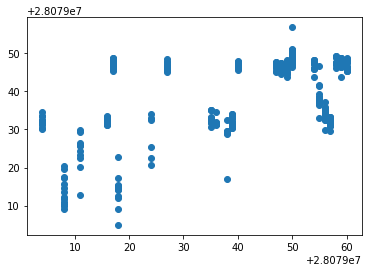

In [53]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [54]:
print(lr.score(x_test,y_test))

0.3253141946482797


In [55]:
lr.score(x_train,y_train)

0.37021982554635013

In [56]:
#lasso
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [57]:
la.score(x_test,y_test)

0.08521488528075716

In [58]:
#ridge
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [59]:
rr.score(x_test,y_test)

0.29476362380362797

In [60]:
#logistic
b=StandardScaler().fit_transform(x)


In [61]:
p=LogisticRegression(max_iter=10000)
p.fit(x,y)

LogisticRegression(max_iter=10000)

In [62]:
t=[[12,22,32,42,90,45,78,34,21]]

In [63]:
e=p.predict(t)
print(e)

[28079039]


In [64]:
p.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [65]:
print(p.score(x_test,y_test))

0.5433333333333333


In [66]:
p.predict_proba(t)[0][0]

3.708423477777503e-80

In [67]:
p.predict_proba(t)[0][1]

7.570673629313665e-126

In [68]:
#elastic
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [69]:
print(p.coef_)

[ 1.56809153 -0.35427092  3.15056672  2.24186432 -0.56937276  0.02038529
 -0.07151449  0.          0.00937663]


In [70]:
print(p.intercept_)

28079023.106352516


In [71]:
print(p.predict(x_test))

[28079032.39577999 28079033.11406009 28079023.38495736 28079035.75416572
 28079044.01513587 28079047.41126256 28079019.89971003 28079035.02438483
 28079046.38682597 28079044.30404231 28079045.44117954 28079032.14220597
 28079034.20148496 28079032.84612102 28079047.3491247  28079045.49114561
 28079032.95753726 28079045.37438003 28079031.79462193 28079030.62453732
 28079047.84496695 28079046.34092483 28079046.18791338 28079047.52028355
 28079033.40984229 28079045.67667471 28079034.9820339  28079022.34636136
 28079022.2118403  28079030.6336926  28079018.32680612 28079020.35138804
 28079042.17523221 28079046.26017066 28079047.71957229 28079021.92792837
 28079045.47276851 28079046.93179398 28079022.50806992 28079034.4085087
 28079047.06894486 28079046.45358604 28079035.39760379 28079034.51043124
 28079032.33179941 28079047.3491247  28079034.16797185 28079045.2773497
 28079032.02540035 28079047.84972611 28079031.82011455 28079045.25789308
 28079019.04156766 28079035.84443346 28079045.6582928

In [72]:
print(p.score(x_test,y_test))

0.26029858309361253


In [73]:
#randomforest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
parameters={'max_depth':[1,12,75,3,53],
  'min_samples_leaf':[5,34,36,78,45],
           'n_estimators':[3,93,74,23,90]}

In [75]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 12, 75, 3, 53],
                         'min_samples_leaf': [5, 34, 36, 78, 45],
                         'n_estimators': [3, 93, 74, 23, 90]},
             scoring='accuracy')

In [76]:
grid_search.best_score_

0.5628571428571428

In [77]:
rfc_best=grid_search.best_estimator_

[Text(1139.9617346938776, 2568.5099999999998, 'X[8] <= 4.5\ngini = 0.956\nsamples = 444\nvalue = [32, 21, 42, 31, 27, 29, 25, 34, 29, 38, 31, 22\n21, 43, 22, 30, 21, 21, 33, 25, 34, 31, 26, 32]'),
 Text(483.9795918367347, 2378.25, 'X[0] <= 2.6\ngini = 0.902\nsamples = 199\nvalue = [32, 0, 42, 0, 0, 2, 2, 0, 0, 38, 31, 5, 21\n43, 22, 0, 21, 0, 33, 5, 34, 0, 0, 0]'),
 Text(113.87755102040816, 2187.99, 'X[3] <= 0.15\ngini = 0.684\nsamples = 70\nvalue = [0, 0, 42, 0, 0, 2, 2, 0, 0, 0, 31, 0, 0, 0\n0, 0, 0, 0, 33, 0, 0, 0, 0, 0]'),
 Text(75.91836734693878, 1997.73, 'gini = 0.266\nsamples = 23\nvalue = [0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 6, 0, 0, 0, 0, 0]'),
 Text(151.83673469387756, 1997.73, 'X[4] <= 2.04\ngini = 0.653\nsamples = 47\nvalue = [0, 0, 10, 0, 0, 2, 2, 0, 0, 0, 31, 0, 0, 0\n0, 0, 0, 0, 27, 0, 0, 0, 0, 0]'),
 Text(75.91836734693878, 1807.4699999999998, 'X[5] <= 5.5\ngini = 0.128\nsamples = 19\nvalue = [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 27, 

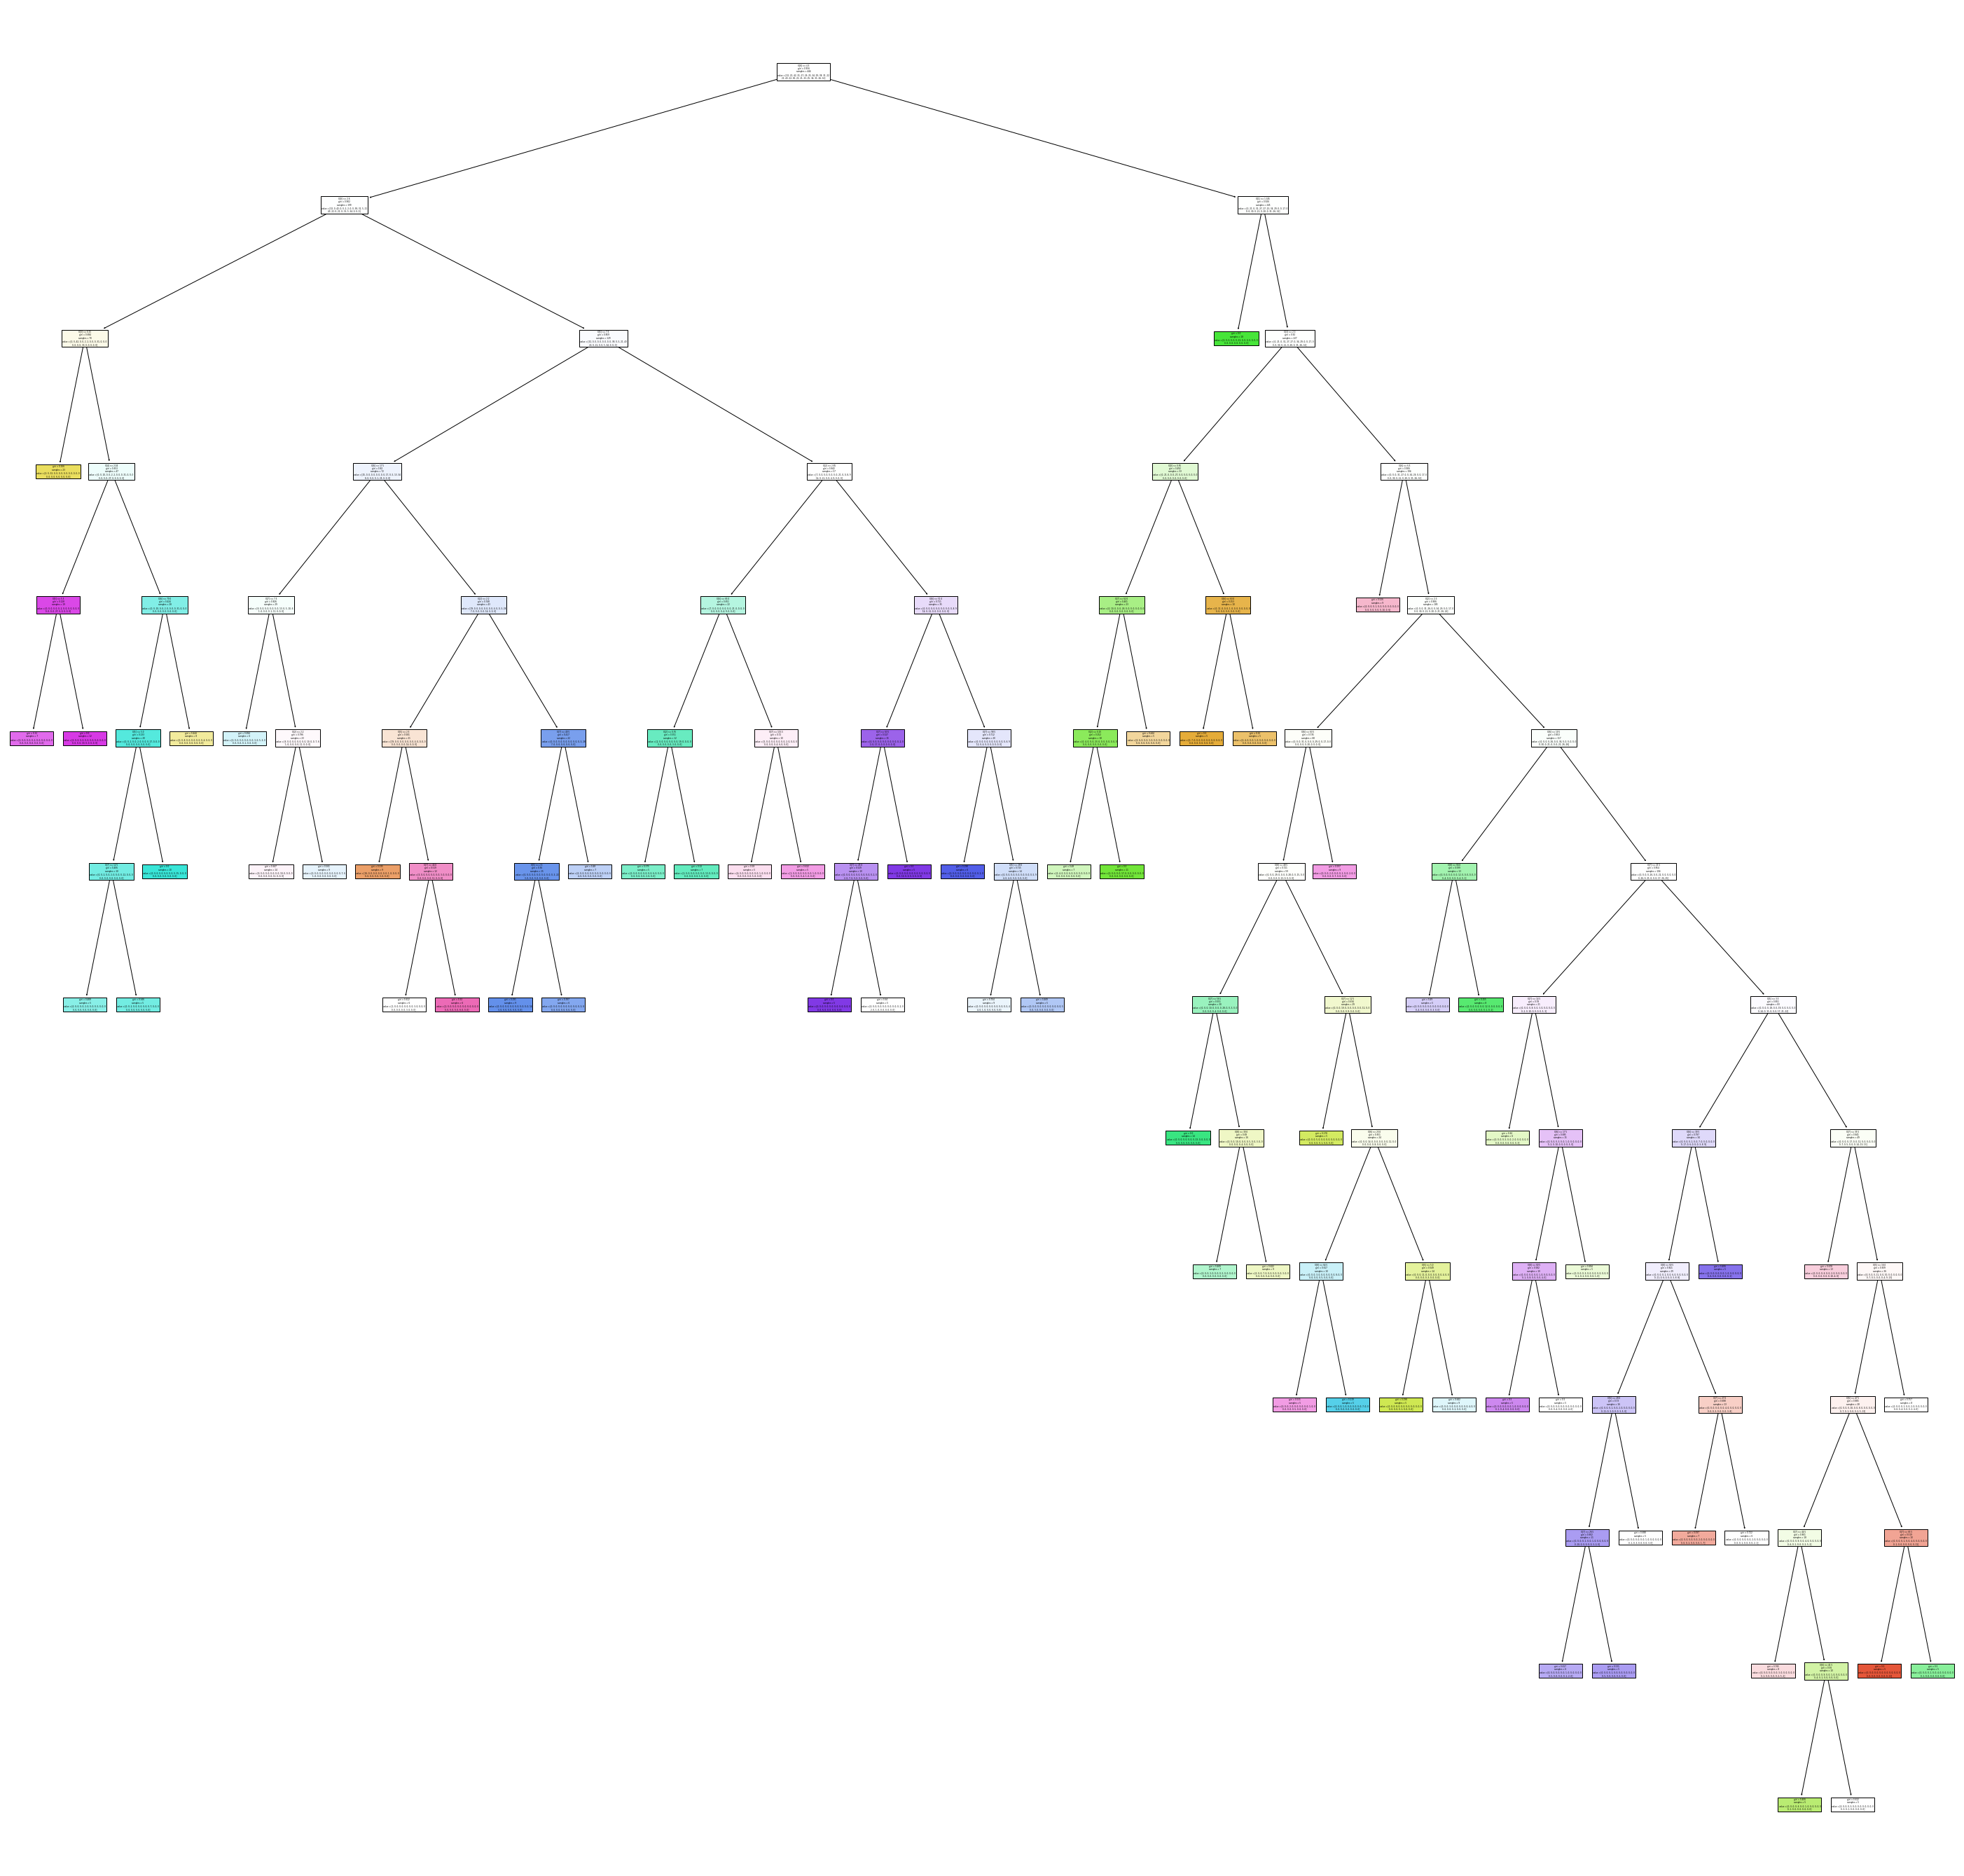

In [78]:
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:RANDOM FOREST SCORE=0.5628571428571428 is a Highest accuracy